# Imporing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions
from sklearn.ensemble import IsolationForest

# Read the Training Data

In [2]:
file_path=r"F:\DATA_SCIENCE\Machile_learing_projects\Campusx_projects\Flight_Price_Prediction\Data\train.csv"

In [3]:
train=pd.read_csv(file_path)

In [4]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-12,Delhi,Cochin,02:00:00,07:45:00,345,1.0,No info,6386
1,Air Asia,2019-05-21,Kolkata,Banglore,22:40:00,10:40:00,720,1.0,No info,9719
2,Indigo,2019-04-01,Kolkata,Banglore,17:15:00,19:50:00,155,0.0,No info,4174
3,Jet Airways,2019-03-06,Banglore,New Delhi,08:00:00,07:40:00,1420,1.0,No info,14815
4,Air India,2019-03-15,Chennai,Kolkata,11:40:00,13:55:00,135,0.0,No info,7082


In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train=train.assign(**{
    col:pd.to_datetime(train.loc[:,col])
    for col in ['date_of_journey','dep_time','arrival_time']
})

C:\Users\rajkr\AppData\Local\Temp\ipykernel_7940\3435688279.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:,col])
C:\Users\rajkr\AppData\Local\Temp\ipykernel_7940\3435688279.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:,col])


In [7]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [8]:
# # High level summary of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [9]:
# Taking some statistical information
train.describe(include='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,656.953125,0.817187,8825.834375
std,515.050871,0.656747,4260.001475
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5073.000000
50%,545.000000,1.000000,8040.000000
75%,960.000000,1.000000,12193.500000
max,2345.000000,3.000000,36235.000000


In [10]:
train.describe(include='O')

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,4
top,Jet Airways,Delhi,Cochin,No info
freq,223,261,261,514


In [11]:
#how to include numerical varaiable into categorical and then we are using describe function
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No info
freq,223,261,261,349.0,514


## High-level analysis of missing values

In [12]:
#using our library which we made for EDA
#there is no missing value
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


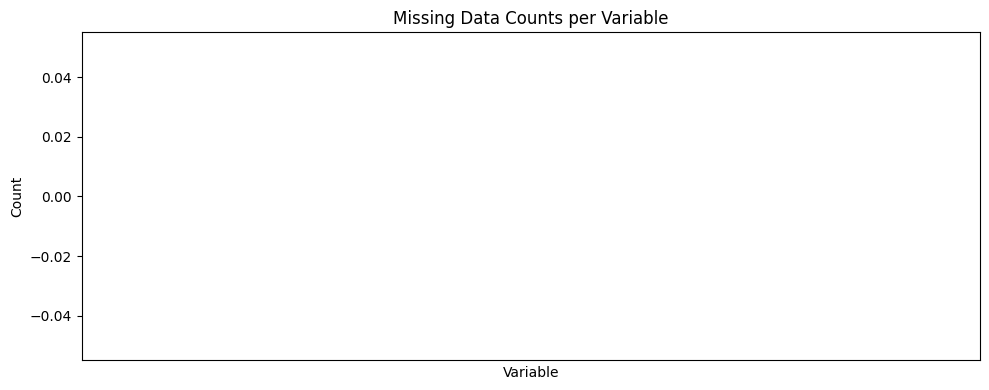

In [13]:
eda_helper_functions.plot_missing_info(train)
#the graph says that there are no missing value in any column

# High level Analysis of Outliers

In [14]:
forest=IsolationForest(n_estimators=10,random_state=42)

In [15]:
#In this particular line of code we are droping our target column
# Applying the IsolationForest algorithm on our dataset
# After applying this algorithm it will crate a column and in this column the information is present in the form of -1 and 1
# here -1 is outliears present and 1 is outlier is nor present
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns='price')
                                       .select_dtypes(include='number')))
    .query('outlier==-1')
)
#the query function is help us to do filteration task on the dataset

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
3,Jet Airways,2019-03-06,Banglore,New Delhi,2024-05-08 08:00:00,2024-05-08 07:40:00,1420,1.0,No info,14815,-1
4,Air India,2019-03-15,Chennai,Kolkata,2024-05-08 11:40:00,2024-05-08 13:55:00,135,0.0,No info,7082,-1
13,Indigo,2019-04-12,Kolkata,Banglore,2024-05-08 14:25:00,2024-05-08 16:55:00,150,0.0,No info,5224,-1
15,Air India,2019-05-18,Kolkata,Banglore,2024-05-08 16:45:00,2024-05-08 12:30:00,1185,2.0,No info,15170,-1
17,Air India,2019-06-09,Kolkata,Banglore,2024-05-08 07:00:00,2024-05-08 05:25:00,1345,2.0,No info,12534,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-08 18:20:00,2024-05-08 12:35:00,1095,2.0,No info,14300,-1
628,Air India,2019-05-21,Delhi,Cochin,2024-05-08 09:45:00,2024-05-08 09:25:00,1420,2.0,No info,10975,-1
629,Air Asia,2019-03-12,Kolkata,Banglore,2024-05-08 22:50:00,2024-05-08 01:20:00,150,0.0,No info,4082,-1
637,Air India,2019-03-24,Mumbai,Hyderabad,2024-05-08 15:00:00,2024-05-08 16:25:00,85,0.0,No info,2050,-1


# Pair plots

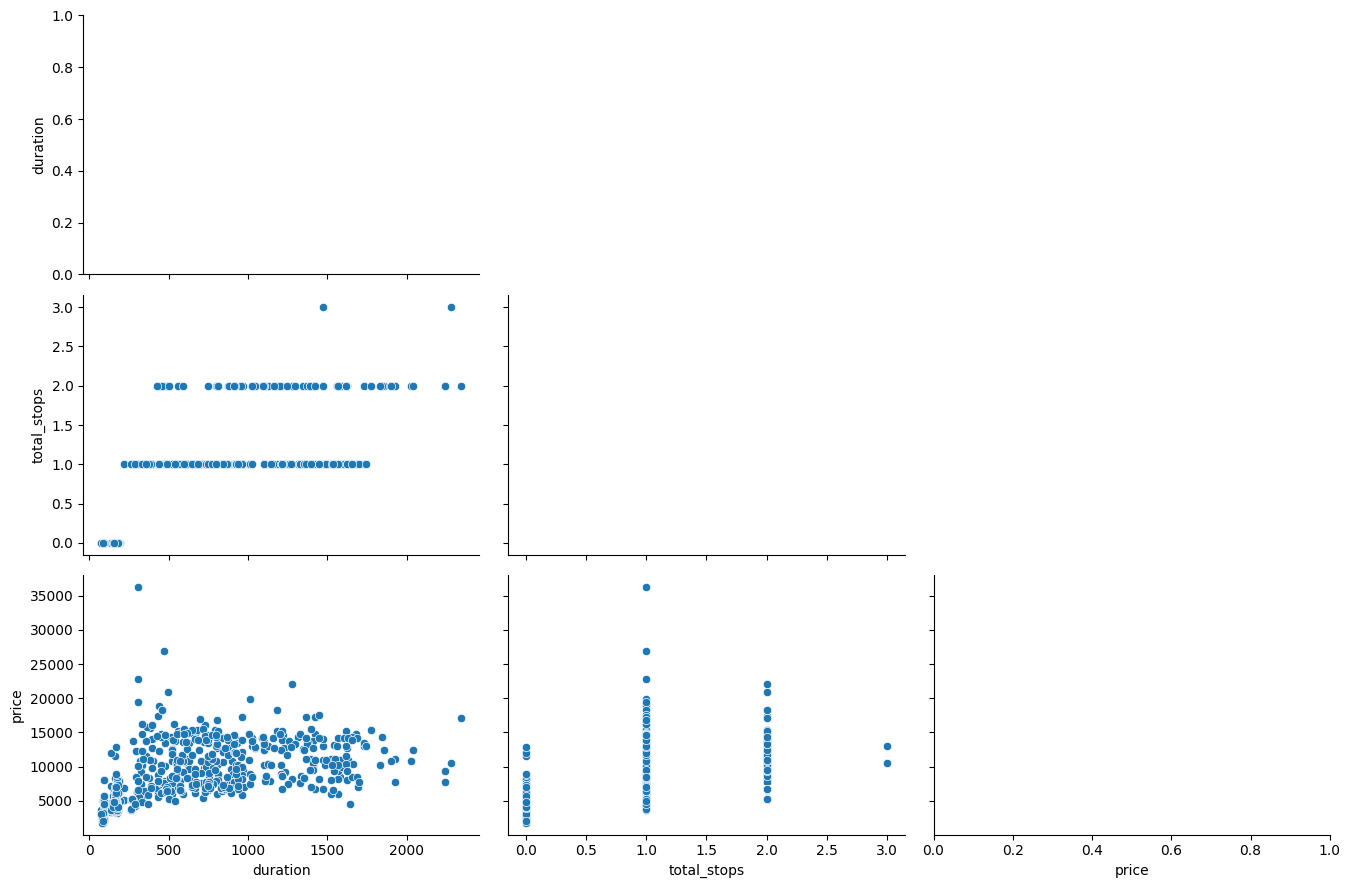

In [16]:
eda_helper_functions.pair_plots(train)
# In this graph you will notice that we only plot the lower half
# the pair plot is symmetric plot and here we aviod the repeted information , 
#for example you look at the duration and price there is linear relationship 

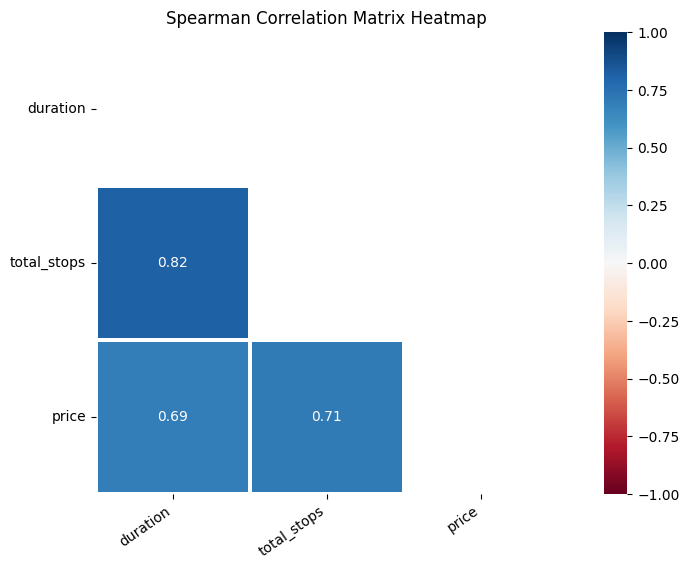

In [17]:
# Correlation Analysis
eda_helper_functions.correlation_heatmap(train,method='spearman')

In [18]:
train.corr(method='spearman',numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.819531,0.687517
total_stops,0.819531,1.000000,0.710616
price,0.687517,0.710616,1.000000


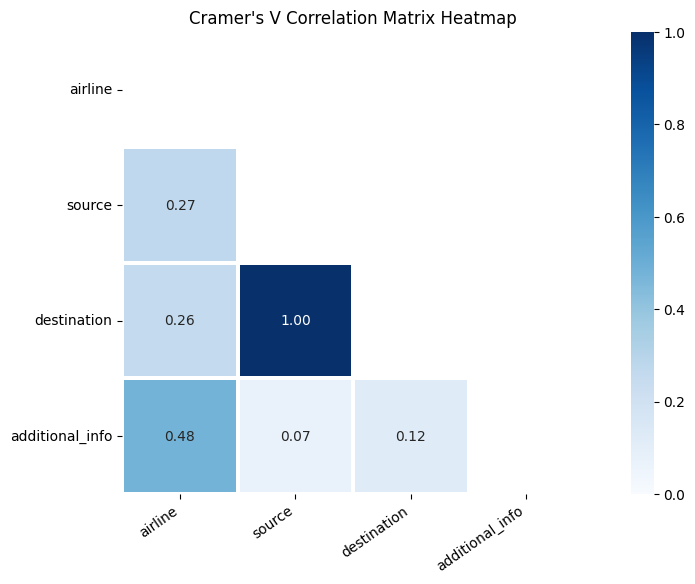

In [27]:
eda_helper_functions.cramersV_heatmap(train)

# Detailed Analysis

In [19]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [21]:
#Airline column understanding

In [22]:
train.airline

0           Indigo
1         Air Asia
2           Indigo
3      Jet Airways
4        Air India
          ...     
635    Jet Airways
636         Indigo
637      Air India
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [23]:
eda_helper_functions.cat_summary(train,'airline')

0           Indigo
1         Air Asia
2           Indigo
3      Jet Airways
4        Air India
          ...     
635    Jet Airways
636         Indigo
637      Air India
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,223


,count,percentage
category,,
Jet Airways,223,0.348438
Indigo,125,0.195312
Air India,112,0.175000
Multiple Carriers,75,0.117188
Spicejet,41,0.064062
Vistara,28,0.043750
Air Asia,27,0.042188
Goair,9,0.014063


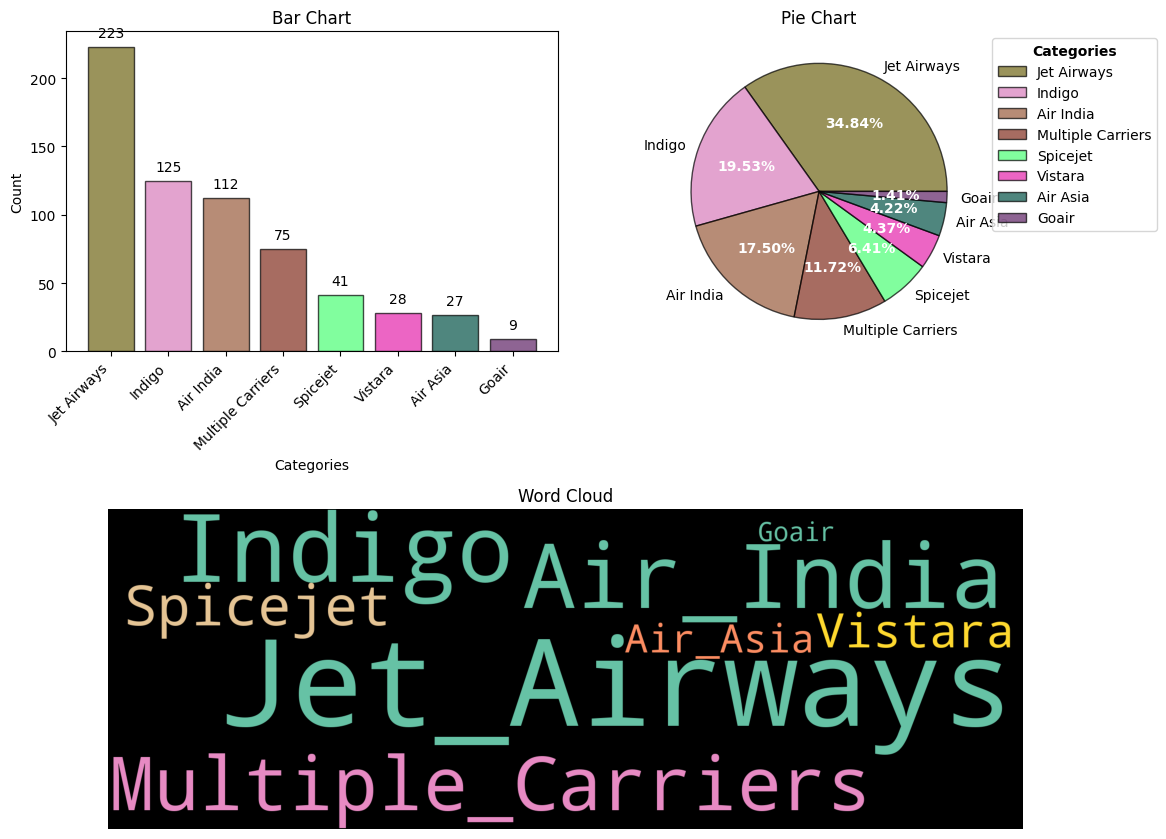

In [25]:
eda_helper_functions.cat_univar_plots(train,'airline')

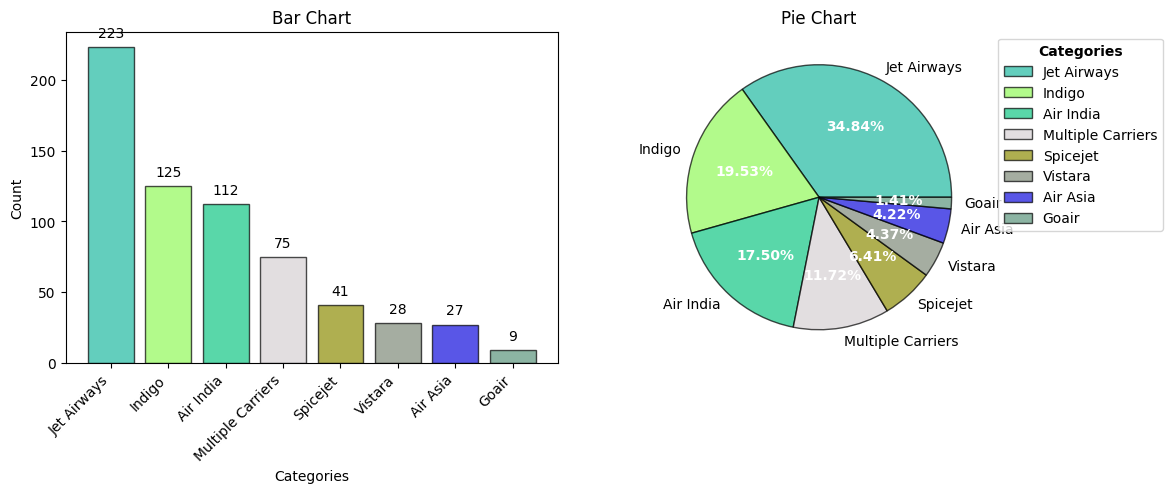

In [26]:
eda_helper_functions.cat_univar_plots(train,'airline',show_wordcloud=False)

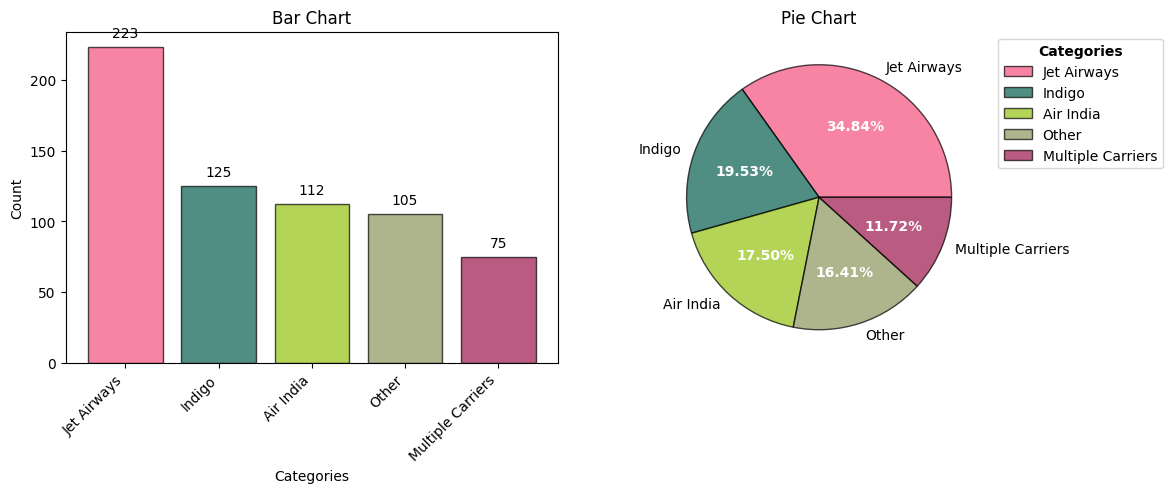

In [28]:
eda_helper_functions.cat_univar_plots(train,'airline',k=4,show_wordcloud=False)


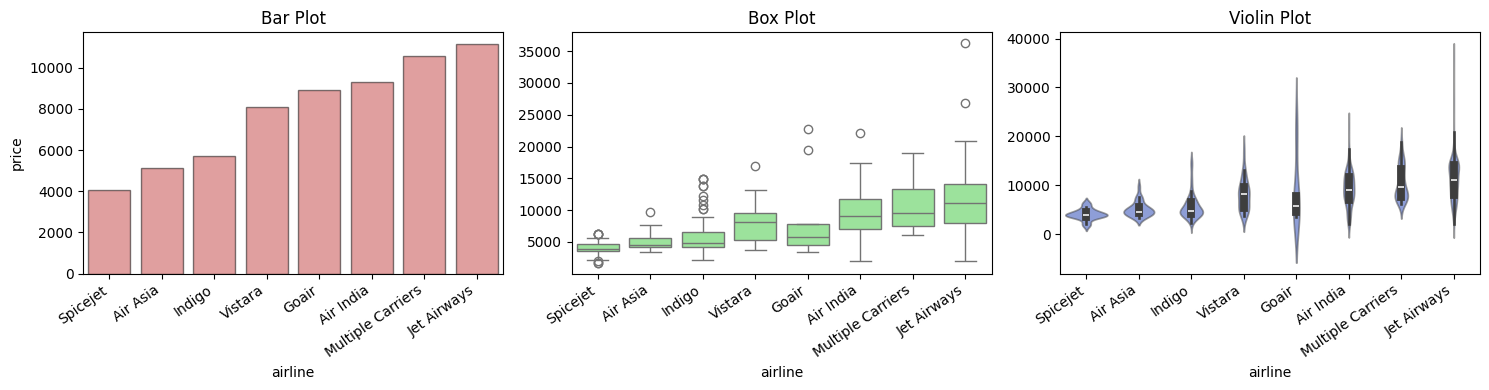

In [31]:
#Bivariate analysis between price and airline
eda_helper_functions.num_cat_bivar_plots(data=train,num_var='price',cat_var='airline')

# Hypothesis Testing

In [32]:
eda_helper_functions.num_cat_hyp_testing(data=train,num_var='price',cat_var='airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 47.46990462575713
- p-value              : 3.985674370018433e-54
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 266.097555142648
- p-value              : 1.0334189946968113e-53
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


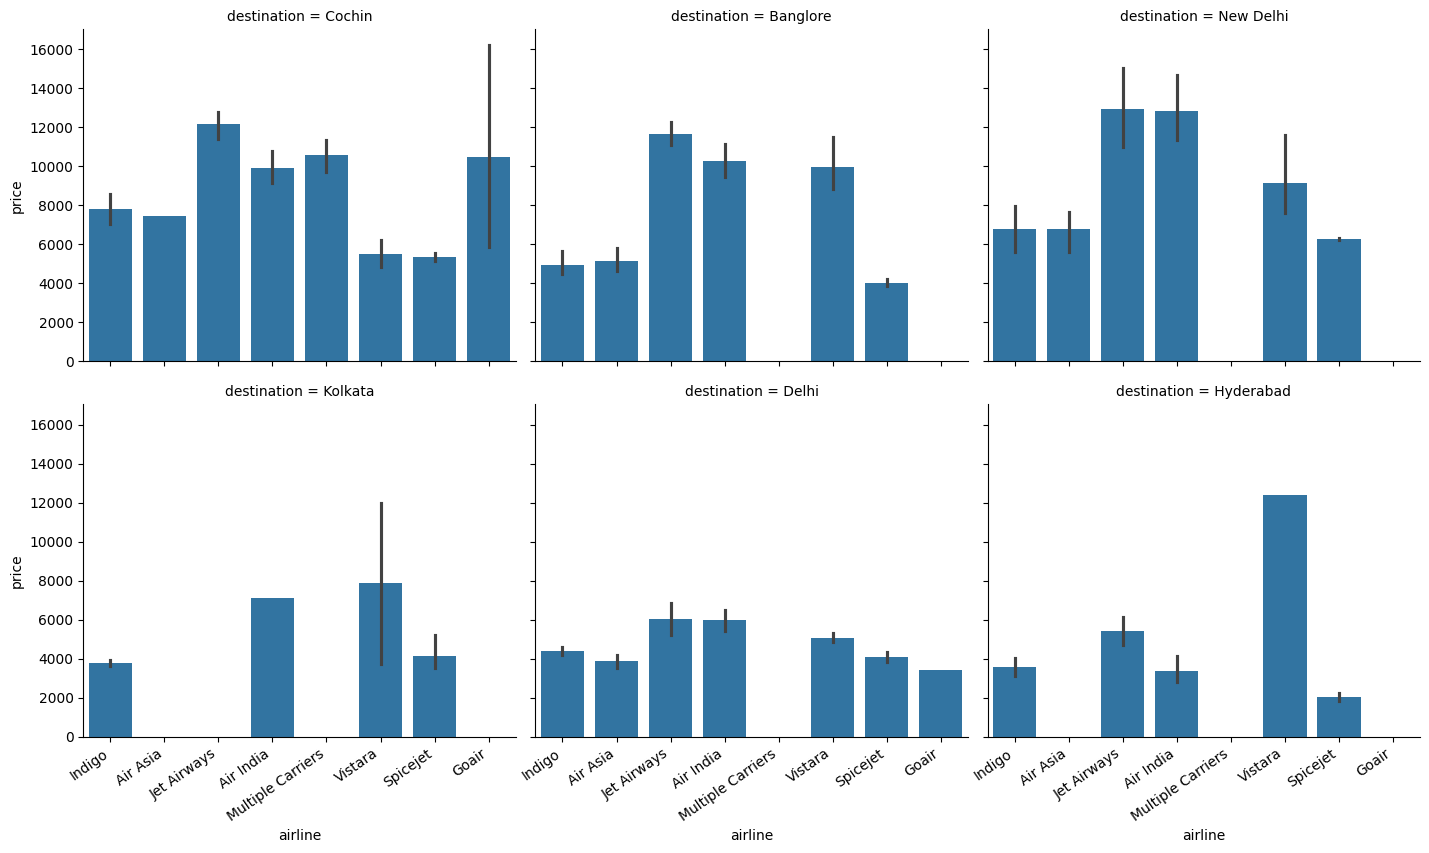

In [42]:
airline_grid=sns.FacetGrid(
    data=train,
    col='destination',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True)
airline_grid.map(sns.barplot,'airline','price',order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

# Date of journey column analysis

In [43]:
train.date_of_journey

0     2019-06-12
1     2019-05-21
2     2019-04-01
3     2019-03-06
4     2019-03-15
         ...    
635   2019-05-24
636   2019-06-24
637   2019-03-24
638   2019-04-01
639   2019-06-09
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

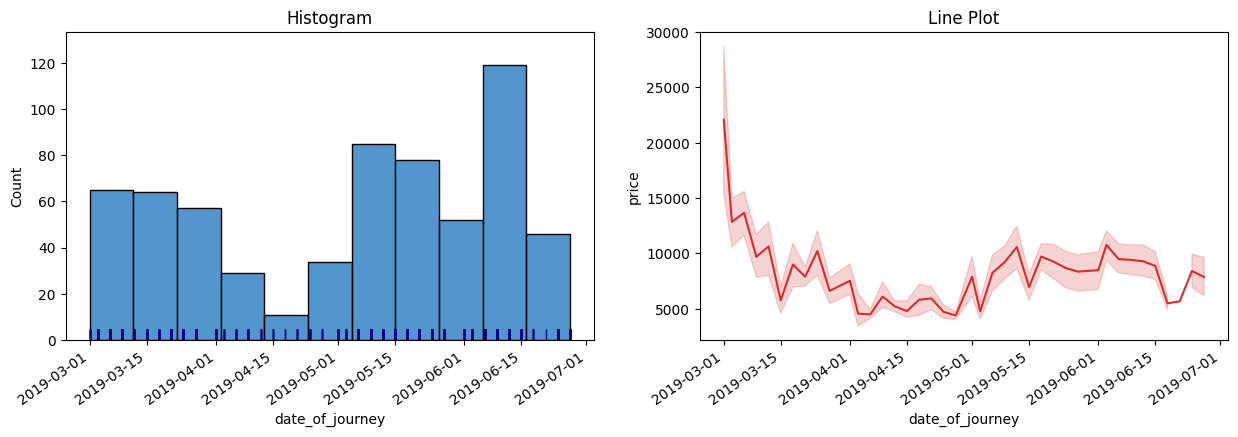

In [45]:
eda_helper_functions.dt_univar_plots(data=train,var='date_of_journey',target='price')

<Axes: xlabel='Month'>

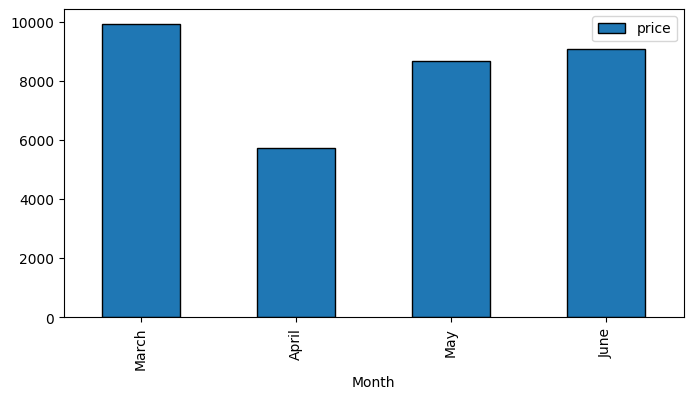

In [56]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq='M'))
    .price.mean()
    .to_frame()
    .set_axis(['March','April','May','June'],axis=0)
    .rename_axis(index='Month')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black')
)

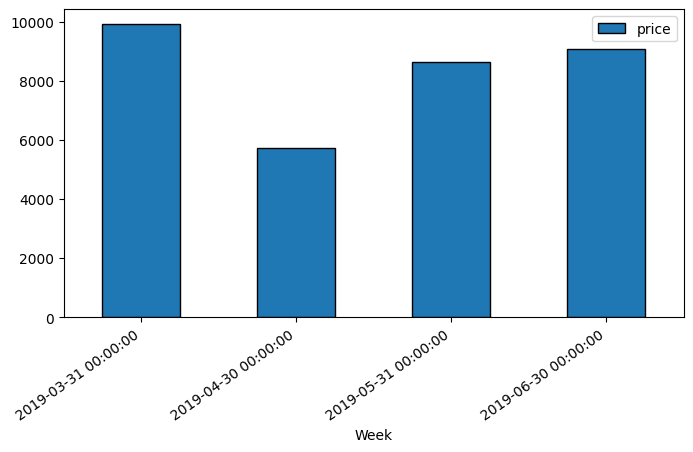

In [65]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq='M'))
    .price.mean()
    .to_frame()
        #.set_axis(['March','April','May','June'],axis=0)
    .rename_axis(index='Week')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black'))
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

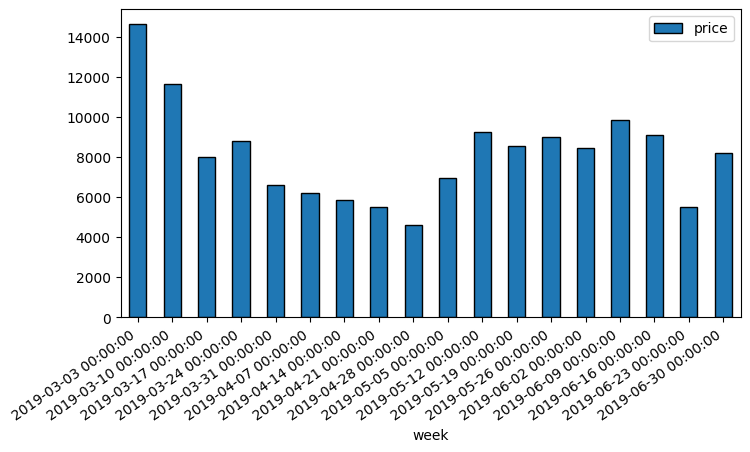

In [64]:
#weekly basis
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq='W'))
    .price.mean()
    .to_frame()
    #.set_axis(['March','April','May','June'],axis=0)
    .rename_axis(index='week')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black')
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

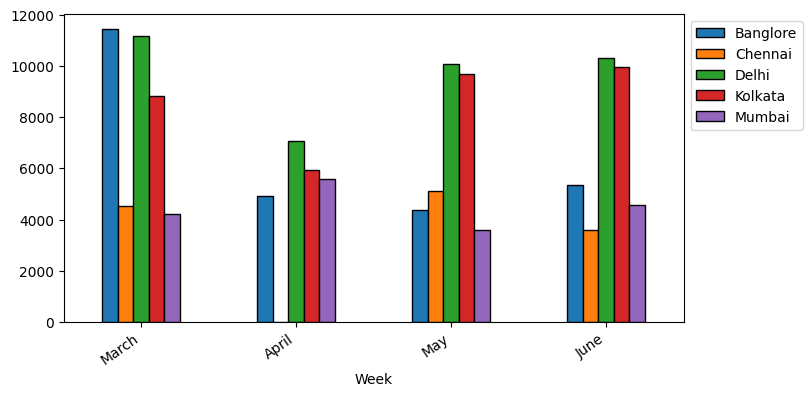

In [71]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey',freq='M'),'source'])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(['March','April','May','June'],axis=0)
    .rename_axis(index='Week')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black')
)
ax=plt.gca()
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

# Dep_time column analysis

In [72]:
train.dep_time

0     2024-05-08 02:00:00
1     2024-05-08 22:40:00
2     2024-05-08 17:15:00
3     2024-05-08 08:00:00
4     2024-05-08 11:40:00
              ...        
635   2024-05-08 07:10:00
636   2024-05-08 15:30:00
637   2024-05-08 15:00:00
638   2024-05-08 18:55:00
639   2024-05-08 06:30:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

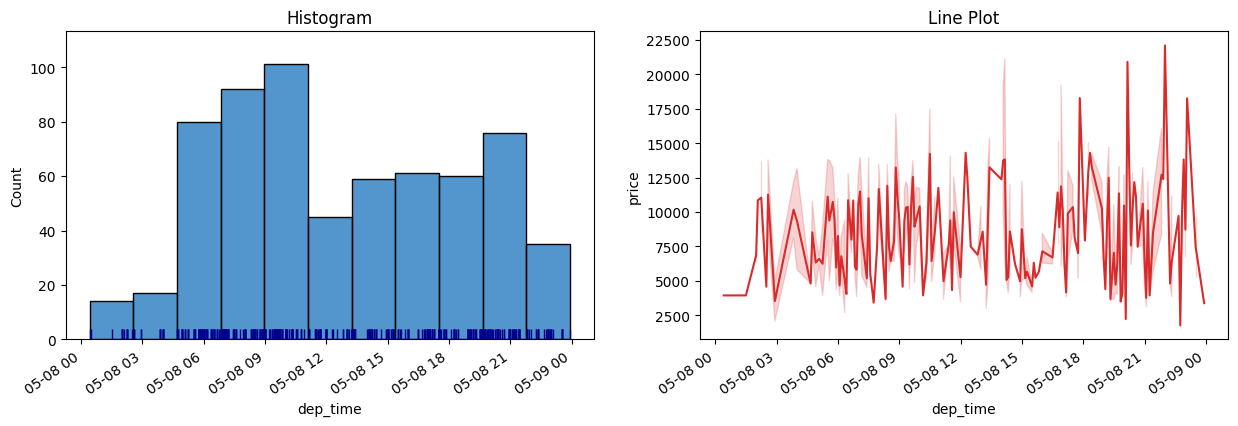

In [73]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price')

In [79]:
#np.select:- it wil take a list of condition1,condition2 etc and then if the condition
# is satisfied then it replace with val 1 ,if anoher and then replace vaalue 
# if all the condition is not stisfied then it will replace the default value that we specified

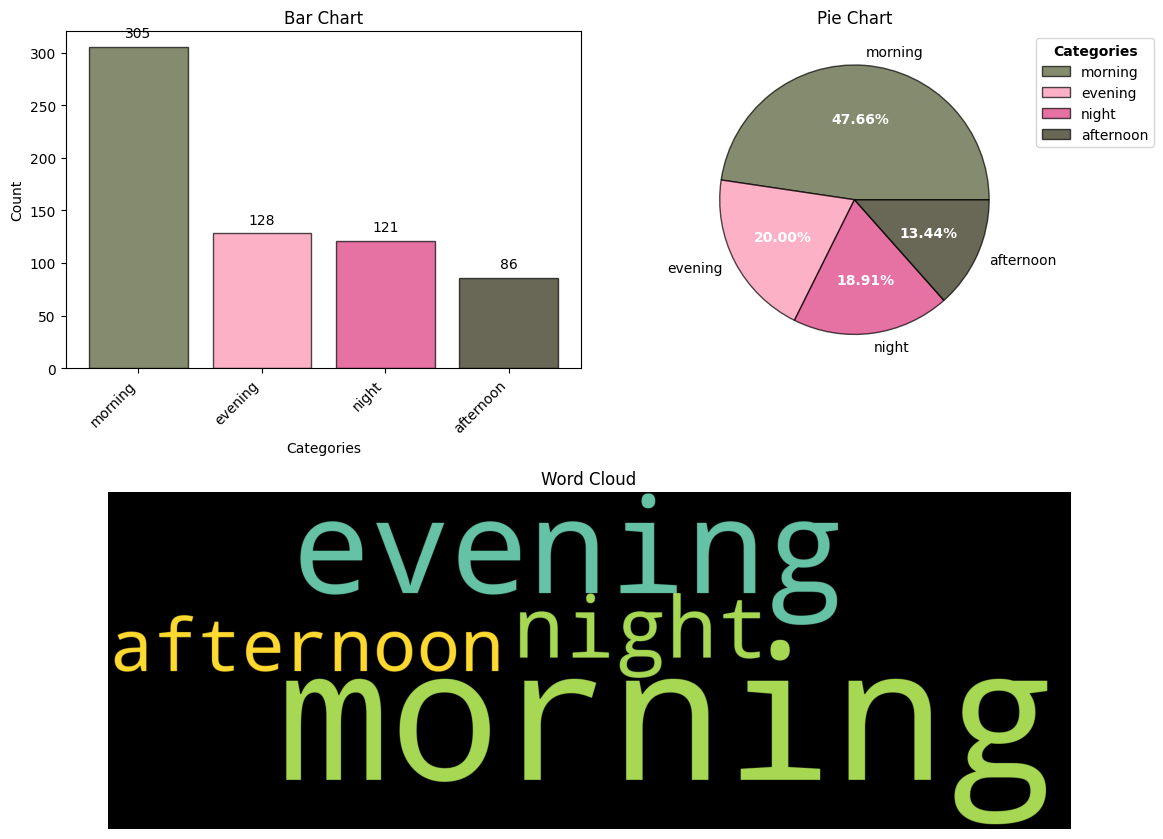

In [88]:
(
    train
    .assign(dep_time=lambda df_:(
        (np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
                df_.dep_time.dt.hour.between(12,16,inclusive='left'),
                df_.dep_time.dt.hour.between(16,20,inclusive='left')],
                ['morning','afternoon','evening'],default='night') )
    ))
    .pipe(eda_helper_functions.cat_univar_plots,'dep_time')
)

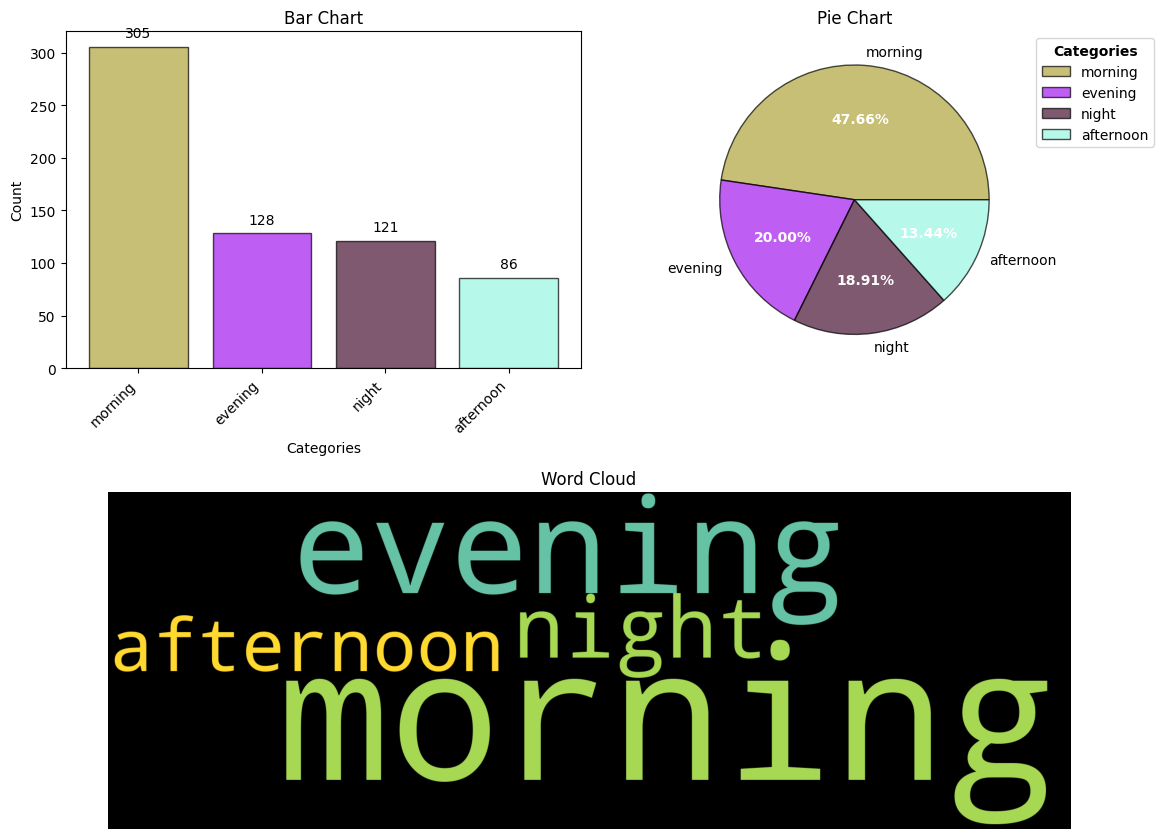

In [92]:
(
    train
    .assign(dep_time=lambda df_:(
        (np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
                df_.dep_time.dt.hour.between(12,16,inclusive='left'),
                df_.dep_time.dt.hour.between(16,20,inclusive='left')],
                ['morning','afternoon','evening'],default='night') )
    ))
    .pipe(eda_helper_functions.cat_univar_plots,'dep_time')
)

# Duration column analysis

In [93]:
train.duration

0       345
1       720
2       155
3      1420
4       135
       ... 
635     180
636     155
637      85
638    1400
639     800
Name: duration, Length: 640, dtype: int64

In [94]:
eda_helper_functions.num_summary(train,'duration')

0       345
1       720
2       155
3      1420
4       135
       ... 
635     180
636     155
637      85
638    1400
639     800
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,90.0
10,140.0
25,170.0
50,545.0
75,960.0
90,1475.0
95,1625.0
99,1925.0


,value
mean,656.953125
trimmed mean (5%),624.652778
trimmed mean (10%),597.714844
median,545.000000


,value
var,265277.399990
std,515.050871
IQR,790.000000
mad,375.000000
coef_variance,0.783999


,value
skewness,0.797894
kurtosis,-0.292351


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.2592477109105405e-20
Test Statistic       : 0.8962734937667847
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 21.31420269431044
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


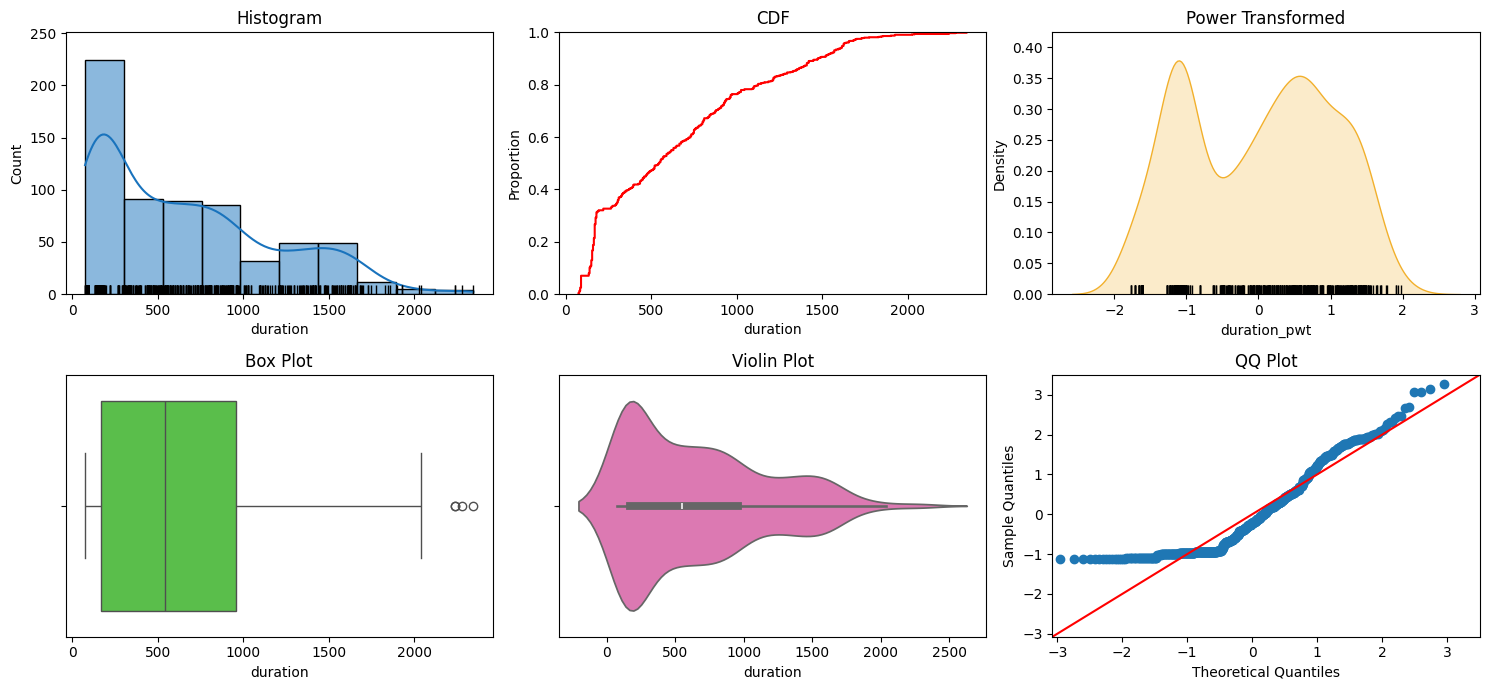

In [96]:
eda_helper_functions.num_univar_plots(train,'duration')

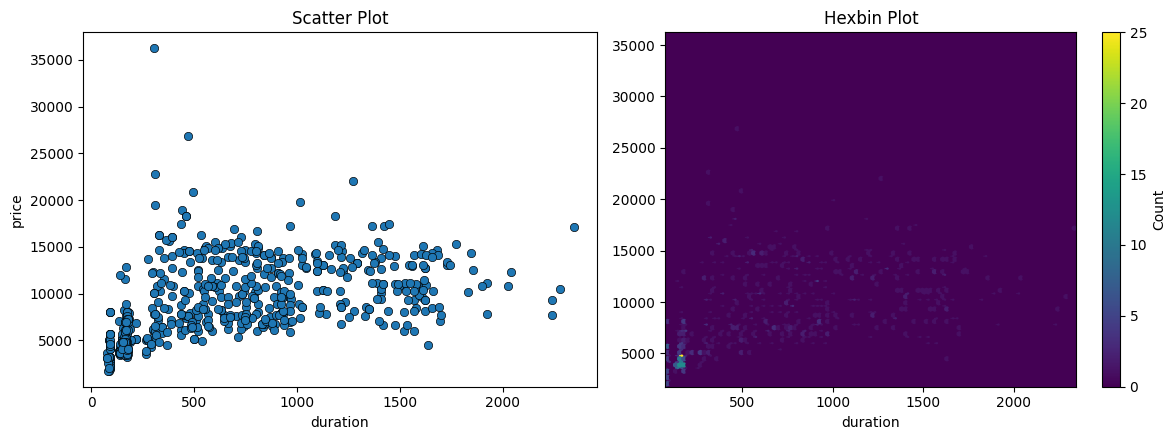

In [99]:
eda_helper_functions.num_bivar_plots(
    train,'duration','price'
)

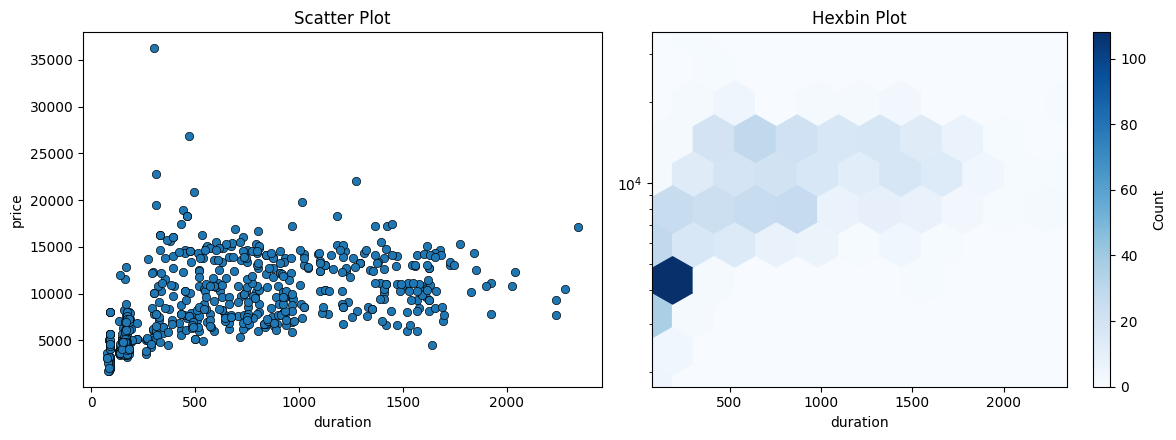

In [102]:
eda_helper_functions.num_bivar_plots(
    train,'duration','price',
    hexbin_kwargs=dict(
        yscale='log',
        gridsize=10,
        cmap='Blues')
)

In [103]:
eda_helper_functions.num_num_hyp_testing(train,'price','duration')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5169480769830932
- p-value              : 5.102192039151587e-45
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6875169038774505
- p-value              : 1.0072544876317455e-90
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


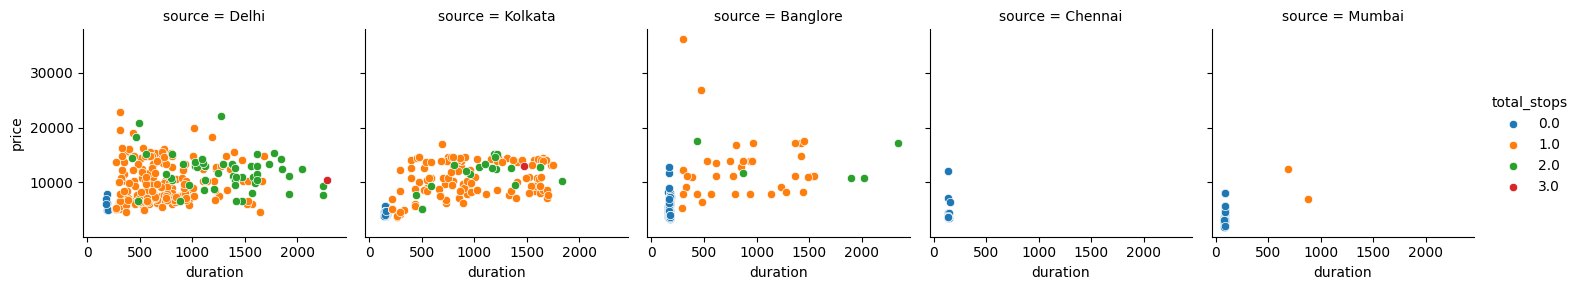

In [106]:
duration_grid=sns.FacetGrid(
    data=train,
    col='source',
    hue='total_stops',
    sharey=True
)
duration_grid.map(sns.scatterplot,'duration','price')
duration_grid.add_legend()

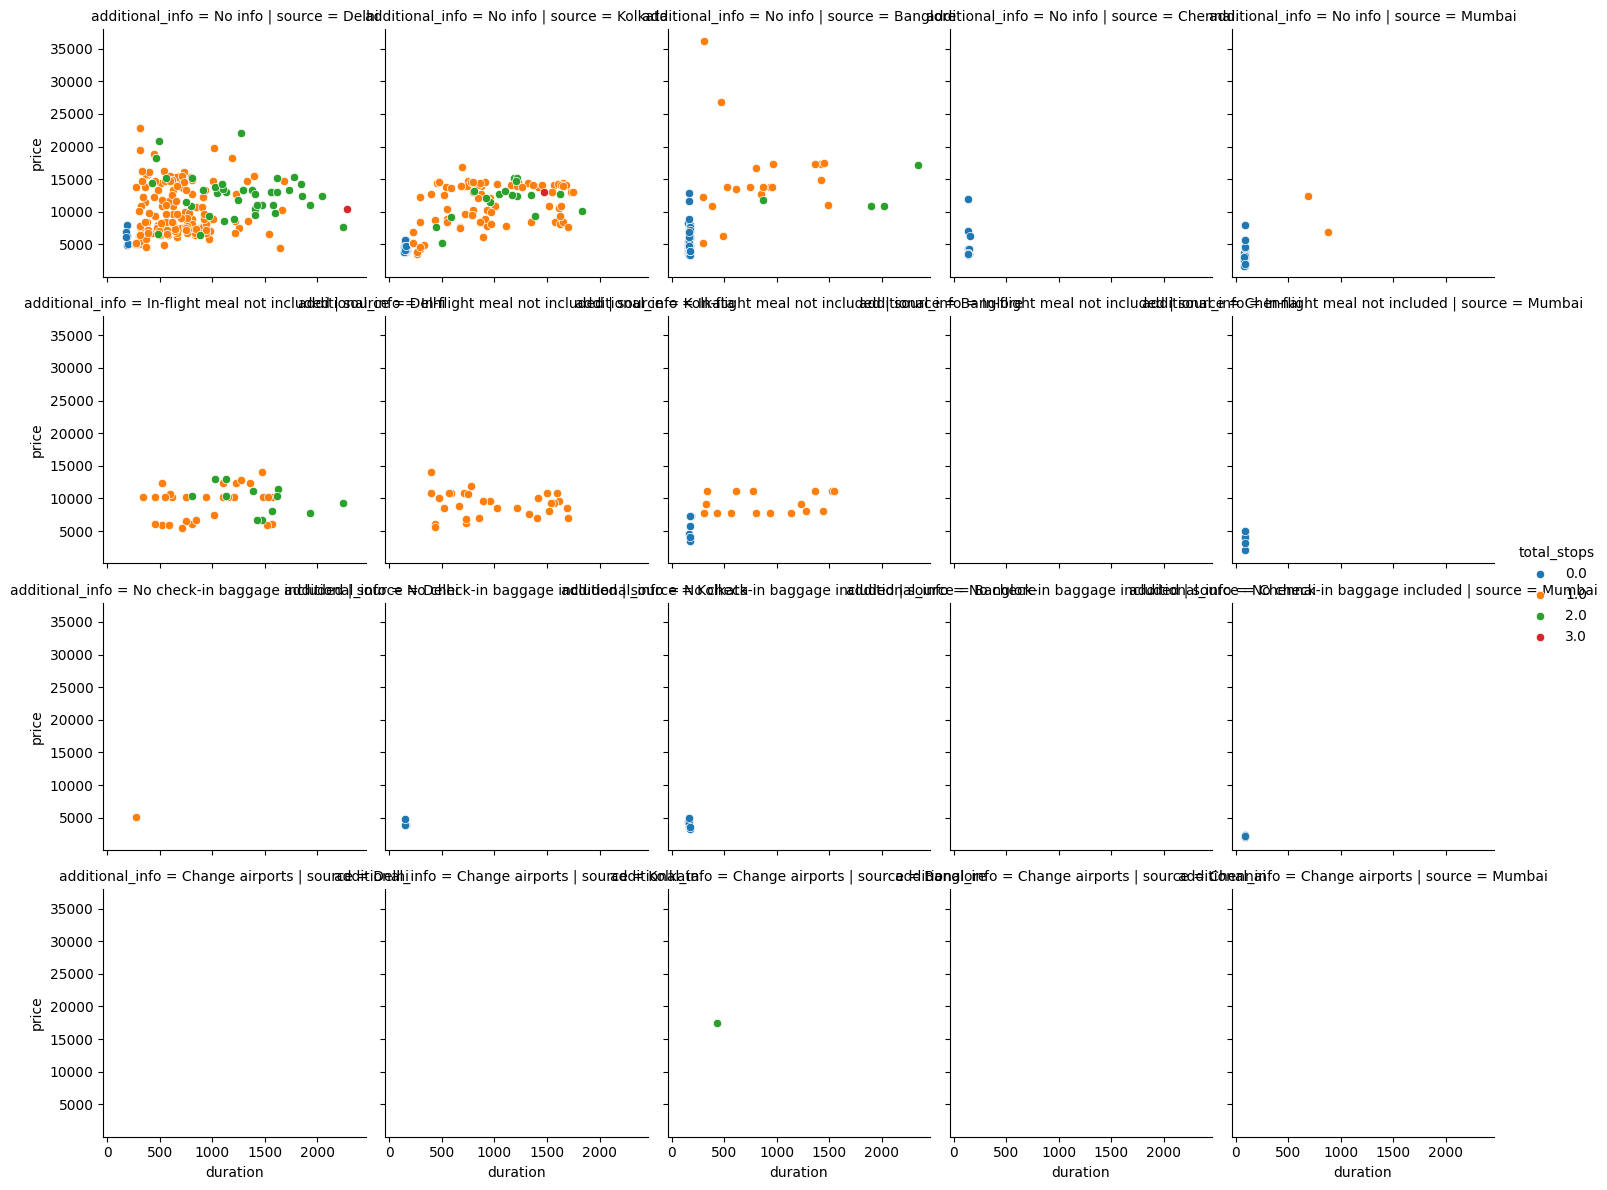

In [107]:
duration_grid=sns.FacetGrid(
    data=train,
    col='source',
    row='additional_info',
    hue='total_stops',
    sharey=True
)
duration_grid.map(sns.scatterplot,'duration','price')
duration_grid.add_legend()

## Autometed EDA

In [108]:
# here are some libraries which can help us to do Automated EDAabs
# Pandas Profiling (ydata-profiling)
#Sweetviz
#Autoviz
#D-Tale